# Tema 2 - Taxi Driver

### Autori: 
* George Muraru


## 2. Scopul temei

Tema are ca scop folosirea unor tehnici simple de reinforcement learning pentru a realiza un bot care "știe" să realizeze o sarcină simplă: să transporte o persoană dintr-o locație în alta.

Mai multe detalii despre joc se pot găsi [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py) și [aici](https://gym.openai.com/envs/Taxi-v3/).

## 3. Workspace Setup

Pentru environmentul de joc, vom folosi "Gym" - un tool oferit de OpenAI pentru Reinforcement Learning.

Mai multe detalii puteți găsi [aici](https://gym.openai.com/).

### Dependețe

In [1]:
!pip install -U gym

  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656448 sha256=28ec38fe7d64c06d99fd39dc12f403f3f7cb88fa7486e3a62022749f6efd94da
  Stored in directory: c:\users\supersaiyansobo\appdata\local\pip\cache\wheels\99\f7\e3\d6f0f120ac047c1e5de2ae34930e7bf6e8de1c7a4d5fa68555
Successfully built gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


You should consider upgrading via the 'c:\users\supersaiyansobo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


### Import biblioteci

In [3]:
import gym
import seaborn as sns
import numpy as np

# Set seaborn plotting type
sns.set()


import random
import time
from IPython.display import clear_output

### Setup Environment pentru Taxi

In [4]:
env = gym.make('Taxi-v3')

### Parametrii

In [5]:
LOG_INTERVAL = 100 #@param {type: "slider", min: 0, max: 1000, step: 10}
NR_EPISODES = 2000 #@param {type: "slider", min: 5, max: 10000, step: 5}



### Hyperparametrii

In [6]:
ALPHA = 0.1 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
GAMMA = 0.9 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
EPSILON = 0.2 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}

# For BONUS

DECAY_EPS = 0.95 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.05}
DECAY_EPS_EPISODES = 100 #@param {type: "slider", min: 0, max: 10000, step: 5}

## 4 Problemă de rezolvat

Dorim să implementăm un bot care utilizează Q-Learning sau Sarsa pentru a realiza un task simplu - transportarea unei persoane de la o poziție la alta.

De asemenea, dorim să observăm ce se întamplă când modifăm diferiți parametrii ai sistemului:
 - dăm un reward mai mic/mare pentru mișcări inutile
 - scoatem anumite informații din stare


### Choose action (5p)

Funcția `choose_action` are ca parametrii:
- `Q` - tabela de stări-acțiuni/tabelă de utilităti (aceasta se va modifica în pasul de antrenare),
- `state` - starea curentă în care se află jucătorul (în cazul nostru șoferul)
- `eps` - probabilitatea cu care se va alege o mutare random, are rolul de a controla tradeoff-ul dintre *Explorare* și *Exploatare* 

Funcția `choose_action` trebuie să intoarcă o acțiune random cu probabilitate `eps`, altfel acțiunea care maximizează utilitatea din starea curentă.

In [24]:
def choose_action(Q: np.array, state: int, eps: float = 0.0) -> int:
    # TODO: Select an action
    random_value = random.uniform(0, 1)

    # Return 'best' action if > eps
    if (random_value >= eps):
        return np.argmax(Q[state])
    
    # Else return random action 
    return env.action_space.sample() # Explore a random action

### 4.1 Q-Learning (25p)

Implementați algoritmul Q-Learning.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma \max_{a}Q[s_{t+1}, a] - Q[s_t, a])
$$

Unde:
- `s_t` - starea la momentul `t`
- `a` - acțiunea aleasă la momentul `t`
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- `s_{t+1}` - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

#### Train

In [31]:
REWARDS = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)

        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        max_q = np.max(Q[next_state])
        Q[state][action] = Q[state, action] + ALPHA * (reward + GAMMA * max_q - Q[state, action])

        # TODO: Go to the new state
        state = next_state

    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS

# Save the results for plotting
Q_1 = Q
print("Training Q-Learning finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training Q-Learning finished.



#### Let's check the driver

In [34]:
state = env.reset()
has_ended = False

while not has_ended:
    # TODO: Take always the best action
    action = choose_action(Q, state, -1)

    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


### And the rewards

[Text(0.5, 0, '# episodes'), Text(0, 0.5, 'reward')]

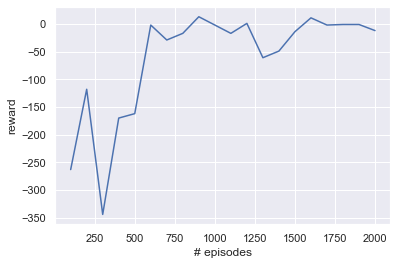

In [35]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.2 SARSA (25p)

Implementați algoritmul SARSA.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma Q[s_{t+1}, a'] - Q[s_t, a])
$$

Unde:
- $s_t$ - starea la momentul `t`
- **a** - acțiunea aleasă la momentul `t`
- **a'** - acțiunea aleasă la momentul `t+1`, presupunând ca suntem în starea $s_{t+1}$
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- $s_{t+1}$ - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

### Train

In [44]:
REWARDS = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    # TODO: Get the action
    action = choose_action(Q, state, eps)

    while not has_ended:
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # TODO: Get the next_action from the next_state
        next_action = choose_action(Q, next_state, eps)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        max_q = Q[next_state, next_action]
        Q[state][action] = Q[state][action] + ALPHA * (reward + GAMMA * max_q - Q[state][action])

        # TODO: Go to the new state
        state = next_state
        
        # TODO: Update the action
        action = next_action


    if i % LOG_INTERVAL == 0:
        REWARDS.append(total_reward)
        print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS


# Save for plotting

Q_2 = Q
print("Training SARSA finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training SARSA finished.



#### Let's check the driver

In [46]:
state = env.reset()
has_ended = False

while not has_ended:
    # TODO: Take always the best action
    action = np.argmax(Q[state])
    
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


#### And the rewards

In [ ]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.3 Results (35p)



Modificați parametrii algoritmilor (cele de la începutul Notebook-ului), faceți grafice pentru fiecare caz și explicați rezultatele obținute.

Unii (și nu numai) dintre paramatrii pe care îi puteți modifica:
- numărul de episoade de antrenare
- `eps` mai mic/mare
- valoarea lui $\gamma$
- valoarea lui $\alpha$


#### 4.4 And something more... (10p)

##### A simple move (5p)


Dorim să vedem importanța reward-ului și a stării.

Modificați celula de antrenare pentru una dintre metode astfel încât reward-ul pentru o **mutare simplă** să fie 0, (acum este -1). Refaceți graficul metodei alese și trageți concluziile.


##### A little less space (5p)

**Starea** are valori discrete (500 de valori posibile), iar aceasta este encodată folosind metoda d [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L128).

Rescrieți codul astfel încât starea să fie encodată folosind:
$$
(((taxi\_row * 5) + taxi\_column) * 5 + pass\_loc) * 2 + destination
$$
Antrenați unul dintre algoritmi, faceți graficul și explicați rezultatul.

**Atenție!** Trebuie să și modificați cum arată Q (forma matricei).

Hint: Decodarea stării este [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L139)


## 5 BONUS: Some decay on the way (10p)

Analizați ce se întâmplă daca scadeți treptat `eps`, pe măsura antrenării. 

Intuitiv, dorim ca la începutul antrenării agentul să **exploreze** cât mai mult posibil și să atingă un număr mare de stări (în exemplul nostru cu taxiul, nu avem așa multe stări, dar sunt jocuri în care spațiul stărilor poate fi mai mare).

De asemenea, pe măsură ce continuăm antrenarea, dorim ca taximetristul să înceapă să **exploateze** mai mult stările cunoscute cu o utilitate mare.

